# COVID-19 Tweet Sentiment Analysis using HuggingFace Pipelines

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
data_df = pd.read_csv('/kaggle/input/800k-covid19-vaccine-tweets/vaccine_tweets.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1,2,3,4,5,7,8,9,10,11,15,16,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data_df.head(5)

,username,user_display_name,user_description,user_location,user_verified,user_protected,user_followers_count,user_friends_count,user_statuses_count,user_favourites_count,tweet_content,tweet_language,tweet_retweet_count,tweet_quote_count,tweet_reply_count,tweet_like_count,tweet_id,tweet_url,tweet_date
0,JosephRLeduc,_|®$€¶H 🤪🇨🇦,I'm fully vaccinated and even wear a mask!\nWh...,🇨🇦,False,False,4108.0,4771,21924,22908,Covid-19 denial and inaction from many politic...,en,0.0,0.0,0.0,0,1476898137860018179,https://twitter.com/JosephRLeduc/status/147689...,2021-12-31 12:48:50+00:00
1,MartinesPrisci,prisci martines,NaN,un mundo raro,False,False,2795.0,3538,361761,44778,Most of the World's Vaccines Likely Won't Prev...,en,0.0,0.0,0.0,0,1476898058667450368,https://twitter.com/MartinesPrisci/status/1476...,2021-12-31 12:48:31+00:00
2,SamerItani9,أبو عيسى,NaN,"Dubai, United Arab Emirates",False,False,83.0,326,409,3977,"@ibn_Haile_ Vaccines, contagion, epidemics are...",en,0.0,0.0,0.0,0,1476898049444229121,https://twitter.com/SamerItani9/status/1476898...,2021-12-31 12:48:29+00:00
3,HisLilSecretSHY,Shawnaaaa,IG:_SimplySW SC: Simply_SW,Me; Myselff &&' Shy ;* :),False,False,708.0,159,49095,15864,..Your body is still acceptable to the virus t...,en,0.0,0.0,0.0,0,1476898030695686147,https://twitter.com/HisLilSecretSHY/status/147...,2021-12-31 12:48:24+00:00
4,MattM5001,Steve Howe,Awake but not Woke🇺🇸🇺🇸🇺🇸,"Bowleys Quarters, MD",False,False,1215.0,2741,29427,111327,@DavidBaker2263 And….? They never report the...,en,0.0,0.0,0.0,0,1476898005282394112,https://twitter.com/MattM5001/status/147689800...,2021-12-31 12:48:18+00:00


In [4]:
data_df.columns

Index(['username', 'user_display_name', 'user_description', 'user_location',
       'user_verified', 'user_protected', 'user_followers_count',
       'user_friends_count', 'user_statuses_count', 'user_favourites_count',
       'tweet_content', 'tweet_language', 'tweet_retweet_count',
       'tweet_quote_count', 'tweet_reply_count', 'tweet_like_count',
       'tweet_id', 'tweet_url', 'tweet_date'],
      dtype='object')

In [5]:
# Clean out columns I won't need for the sentiment analysis
data_df.drop(columns=['user_location', 'user_verified', 'user_protected', 'user_followers_count',
       'user_friends_count', 'user_statuses_count', 'user_favourites_count', 'tweet_id', 'tweet_url', 'tweet_retweet_count',
       'tweet_quote_count', 'tweet_reply_count', 'tweet_like_count'], inplace=True)

In [6]:
data_df.head(5)

,username,user_display_name,user_description,tweet_content,tweet_language,tweet_date
0,JosephRLeduc,_|®$€¶H 🤪🇨🇦,I'm fully vaccinated and even wear a mask!\nWh...,Covid-19 denial and inaction from many politic...,en,2021-12-31 12:48:50+00:00
1,MartinesPrisci,prisci martines,NaN,Most of the World's Vaccines Likely Won't Prev...,en,2021-12-31 12:48:31+00:00
2,SamerItani9,أبو عيسى,NaN,"@ibn_Haile_ Vaccines, contagion, epidemics are...",en,2021-12-31 12:48:29+00:00
3,HisLilSecretSHY,Shawnaaaa,IG:_SimplySW SC: Simply_SW,..Your body is still acceptable to the virus t...,en,2021-12-31 12:48:24+00:00
4,MattM5001,Steve Howe,Awake but not Woke🇺🇸🇺🇸🇺🇸,@DavidBaker2263 And….? They never report the...,en,2021-12-31 12:48:18+00:00


In [7]:
data_df['tweet_language'].unique()

array(['en', nan, '0', 'tl', 'ca', 'et', 'it', 'pt', 'fr', 'und'],
      dtype=object)

In [8]:
en_data = data_df[data_df['tweet_language'] == 'en'].copy()
en_data.dropna(inplace=True)

## Sentiment Analysis

Here's where I performa the sentiment analysis using the HuggingFace transformers pipeline. This just shows the power of how easy it is to implement natural language processing using the HuggingFace libraries.

In [9]:
from transformers import pipeline
classifier = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

In [10]:
def sentiment_analysis(row):
    item = row['tweet_content']
    output = classifier(item)[0]
    if output['label'] == 'NEGATIVE':
        row['sentiment'] = 0
    else:
        row['sentiment'] = 1
    
    row['score'] = output['score']
    
    return row

In [11]:
random_sample = en_data.sample(1000).copy()
classified_df = random_sample.apply(sentiment_analysis, axis=1)

In [12]:
classified_df.head()

,username,user_display_name,user_description,tweet_content,tweet_language,tweet_date,sentiment,score
427885,BarryMcAree,Barry McAree 💙,Cons colorectal surgeon Antrim | Laparoscopic&...,@paulfrewDUP @AlanStout19 What is said to the ...,en,2021-11-28 11:33:28+00:00,0,0.992379
270586,sapphire_wiccan,ᛚᛖᛟ,"estudante | 21 anos | geek, gamer e perdido no...",@Im_Just_Gideon @e_dayone @Bolverk15 @BSO She ...,en,2021-12-11 15:10:29+00:00,0,0.996464
225964,AsianHeraldNews,Asian Herald,"Asian Herald, the world’s first online news po...","The U.S. death toll from COVID-19 topped 800,0...",en,2021-12-15 06:21:46+00:00,0,0.998119
226597,EspnGreenMamba,Ron Morell,#PureBlood\n#TrumpWon50 \n#VeteransFirst \n#Am...,Un-vaccinated people can't die from the Rona v...,en,2021-12-15 04:35:16+00:00,0,0.759931
403185,yorkspride,National conservative ✝ NO DM's,Love Your Culture~Honour Your Heritage~Respect...,I'm hearing a lot from ex nursing colleagues t...,en,2021-11-30 14:50:25+00:00,0,0.983018


### Drop some columns that are no longer needed

In [13]:
classified_df.drop(columns=['user_display_name', 'user_description', 'tweet_language'], inplace=True)
classified_df.head()

,username,tweet_content,tweet_date,sentiment,score
427885,BarryMcAree,@paulfrewDUP @AlanStout19 What is said to the ...,2021-11-28 11:33:28+00:00,0,0.992379
270586,sapphire_wiccan,@Im_Just_Gideon @e_dayone @Bolverk15 @BSO She ...,2021-12-11 15:10:29+00:00,0,0.996464
225964,AsianHeraldNews,"The U.S. death toll from COVID-19 topped 800,0...",2021-12-15 06:21:46+00:00,0,0.998119
226597,EspnGreenMamba,Un-vaccinated people can't die from the Rona v...,2021-12-15 04:35:16+00:00,0,0.759931
403185,yorkspride,I'm hearing a lot from ex nursing colleagues t...,2021-11-30 14:50:25+00:00,0,0.983018


## Visualization

Now time to start looking at the distribution of positive to negative tweets and their scores. Going forward, 0 will represent the negative tweets and 1 will represent the positive tweet. 

<AxesSubplot:title={'center':'Positive vs Negative Tweets'}>

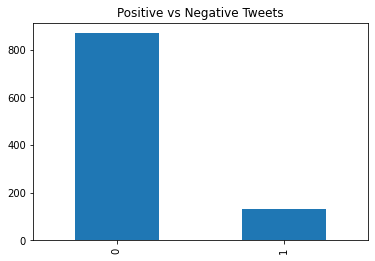

In [14]:
classified_df['sentiment'].value_counts().plot(kind='bar', title='Positive vs Negative Tweets')

Just looking at this first chart it looks like there is a 4 to 1 ratio of negative tweets to positive tweets.


Currently the dates are saved as strings within the data set. Converting them to dates make them easier to aggregate bt and manipulate. On some days there were no positive or negative tweets in this dataset, so there are some gaps in the generated line graph.

In [15]:
def clean_dates(row):
    row['tweet_date'] = row['tweet_date'].date()
    return row

<AxesSubplot:title={'center':'Positive vs Negative tweets by Date'}, xlabel='Date', ylabel='Count'>

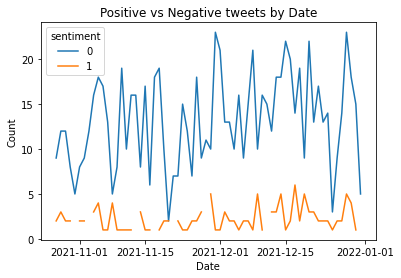

In [16]:
classified_df['tweet_date'] = pd.to_datetime(classified_df['tweet_date'])
classified_df = classified_df.apply(clean_dates, axis=1)
grouped_df = classified_df.groupby(['tweet_date', 'sentiment']).count().drop(columns=['username', 'score'])
grouped_df = grouped_df.reset_index()
grouped_df = grouped_df.pivot(columns='sentiment', values='tweet_content', index='tweet_date')
grouped_df.plot.line(title='Positive vs Negative tweets by Date', xlabel='Date', ylabel='Count')

<AxesSubplot:title={'center':'Score Distribution of Negative Tweets'}, ylabel='Frequency'>

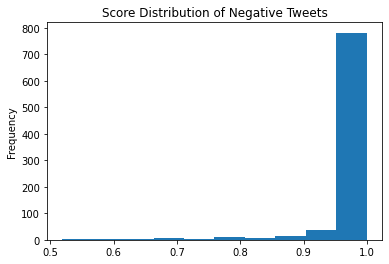

In [17]:
classified_df[classified_df['sentiment'] == 0]['score'].plot(kind='hist', title='Score Distribution of Negative Tweets')

<AxesSubplot:title={'center':'Score Distribution of Negative Tweets for Scores >= 0.8'}, ylabel='Frequency'>

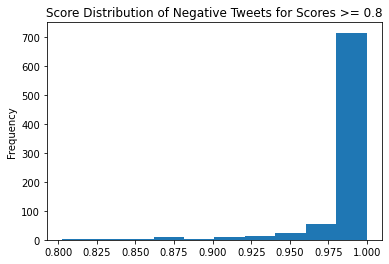

In [18]:
classified_df[(classified_df['sentiment'] == 0) & (classified_df['score'] >= 0.8)]['score'].plot(kind='hist', title='Score Distribution of Negative Tweets for Scores >= 0.8')

<AxesSubplot:title={'center':'Score Distribution of Positive Tweets'}, ylabel='Frequency'>

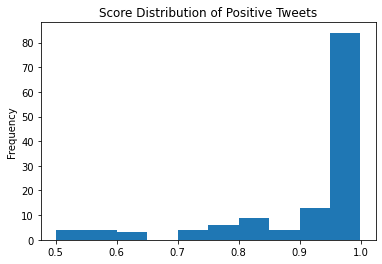

In [19]:
classified_df[classified_df['sentiment'] == 1]['score'].plot(kind='hist', title='Score Distribution of Positive Tweets')

<AxesSubplot:title={'center':'Score Distribution of Positive Tweets for Scores >= 0.7'}, ylabel='Frequency'>

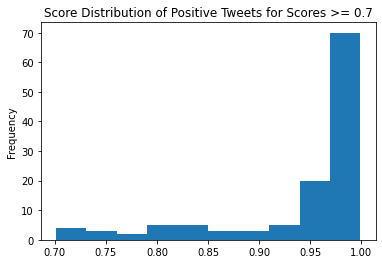

In [20]:
classified_df[(classified_df['sentiment'] == 1) & (classified_df['score'] >= 0.7)]['score'].plot(kind='hist', title='Score Distribution of Positive Tweets for Scores >= 0.7')

<AxesSubplot:title={'center':'Average Score for Positive and Negative Tweets'}, xlabel='sentiment'>

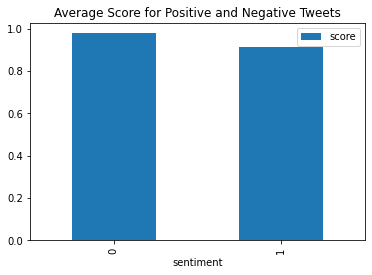

In [21]:
classified_df.drop(columns=['tweet_content', 'tweet_date', 'username']).groupby('sentiment').mean().plot(kind='bar', title='Average Score for Positive and Negative Tweets')

Adds a column for the length of the tweet to see if that has an impact on the percieved sentiment.

In [22]:
def get_tweet_len(row):
    row['tweet_len'] = len(row['tweet_content'])
    return row

In [23]:
classified_df = classified_df.apply(get_tweet_len, axis=1)
classified_df.head(5)

,username,tweet_content,tweet_date,sentiment,score,tweet_len
427885,BarryMcAree,@paulfrewDUP @AlanStout19 What is said to the ...,2021-11-28,0,0.992379,337
270586,sapphire_wiccan,@Im_Just_Gideon @e_dayone @Bolverk15 @BSO She ...,2021-12-11,0,0.996464,164
225964,AsianHeraldNews,"The U.S. death toll from COVID-19 topped 800,0...",2021-12-15,0,0.998119,298
226597,EspnGreenMamba,Un-vaccinated people can't die from the Rona v...,2021-12-15,0,0.759931,129
403185,yorkspride,I'm hearing a lot from ex nursing colleagues t...,2021-11-30,0,0.983018,166


<AxesSubplot:title={'center':'Average Tweet Length for Positive and Negative Tweets'}, xlabel='sentiment'>

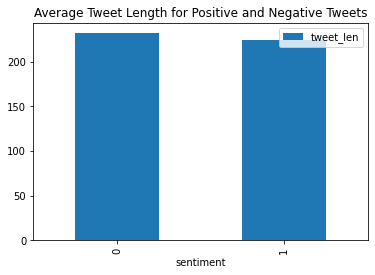

In [24]:
classified_df.drop(columns=['tweet_content', 'tweet_date', 'score', 'username']).groupby('sentiment').mean().plot(kind='bar', title='Average Tweet Length for Positive and Negative Tweets')